<a href="https://colab.research.google.com/github/NguyenThinhDatEng/Deep_Learning/blob/master/Meachine_Learning/Logistic_regression/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# add libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# sigmoid function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [4]:
# load data from file csv
url = 'https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv'
data = pd.read_csv(url).values
# algo
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d - 1)
y = data[:, 2].reshape(-1, 1)

Text(0, 0.5, 'experience (years)')

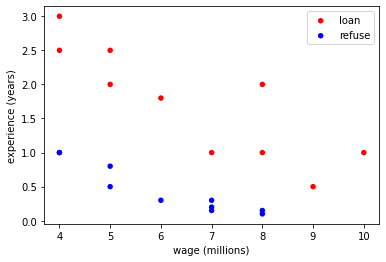

In [5]:
# draw data by scatter
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='loan')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='refuse')
plt.legend(loc=1)
plt.xlabel('wage (millions)')
plt.ylabel('experience (years)')

In [ ]:
# add column 1 to data x
x = np.hstack((np.ones((N, 1)), x))

w = np.array([0., 0.1, 0.1]).reshape(-1, 1)

# number of iterations step 2
numOfIterations = 1000
cost = np.zeros((numOfIterations, 1))
learning_rate = 0.01

for i in range(1, numOfIterations):
  # calculate the predict value
  y_predict = sigmoid(np.dot(x, w))
  cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + \
                    np.multiply(1 - y, np.log(1 - y_predict)))
  # Gradient descent
  w = w - learning_rate * np.dot(x.T, y_predict - y)
  print(cost[i])

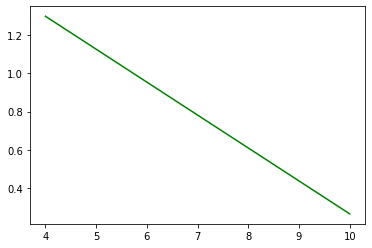

In [16]:
# draw dividing line
t = 0.5
plt.plot((4, 10), (-(w[0] + 4 * w[1] + np.log(1/t - 1))/w[2], -(w[0] + 10 * w[1] + np.log(1/t-1))/w[2]), 'g')
plt.show()

In [19]:
# save weight, format '.npy'
np.save('weight logistic.npy', w)
# load weight from file '.npy'
w = np.load('weight logistic.npy')

In [20]:
# Logistic Regression by sklearn libary
from sklearn.linear_model import LogisticRegression

In [21]:
# load data from file csv
url = 'https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv'
data = pd.read_csv(url).values
# algo
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d - 1)
y = data[:, 2].reshape(-1, 1)

Text(0, 0.5, 'experience (years)')

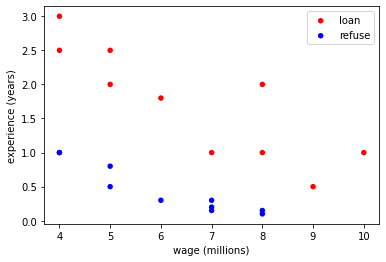

In [22]:
# draw data by scatter
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='loan')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='refuse')
plt.legend(loc=1)
plt.xlabel('wage (millions)')
plt.ylabel('experience (years)')

In [26]:
# create model Logistic Regression and train
logreg = LogisticRegression()
logreg.fit(x, y)

# save this model to array
wg = np.zeros((3, 1))
wg[0, 0] = logreg.intercept_
wg[1:, 0] = logreg.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


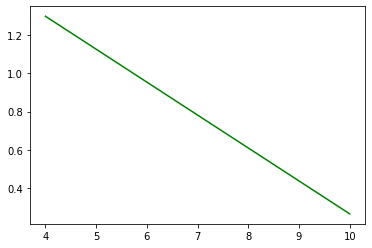

In [27]:
# draw dividing line
t = 0.5
plt.plot((4, 10), (-(w[0] + 4 * w[1] + np.log(1/t - 1))/w[2], -(w[0] + 10 * w[1] + np.log(1/t-1))/w[2]), 'g')
plt.show()

In [28]:
# save the parameters, format '.npz'
np.savez('w logistic.npz', a=logreg.intercept_, b=logreg.coef_)
# load the parameters
k = np.load('w logistic.npz')
logreg.intercept_ = k['a']
logreg.coef_=k['b']